<a href="https://colab.research.google.com/github/VISHNUCHARAN27/DEEP-LEARNING/blob/master/Flowerdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vishnu2799","key":"a3470c3a592aa9d771d440897bc95080"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [0]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 66 Feb 17 10:03 kaggle.json
{"username":"vishnu2799","key":"a3470c3a592aa9d771d440897bc95080"}

In [0]:
!pip install -q kaggle
!pip install -q kaggle-cli

    100% |████████████████████████████████| 81kB 3.2MB/s 
    100% |████████████████████████████████| 5.3MB 5.1MB/s 
    100% |████████████████████████████████| 92kB 21.5MB/s 
    100% |████████████████████████████████| 51kB 13.7MB/s 


# **DOWNLOAD DATASETS**

In [0]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 95% 213M/225M [00:02<00:00, 116MB/s]
100% 225M/225M [00:02<00:00, 111MB/s]


In [0]:
!unzip flowers-recognition.zip


Archive:  flowers-recognition.zip
   creating: flowers/
   creating: flowers/daisy/
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating

In [0]:
%ls


flowers/  flowers-recognition.zip  kaggle.json  sample_data/


# **CHECK THE IMAGE DATASETS**

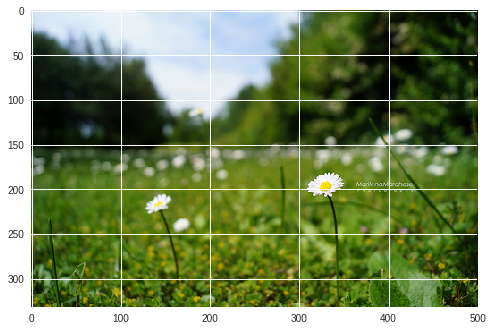

In [0]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

datadir='flowers'
categories=['daisy','dandelion','rose','sunflower','tulip']

for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img))
    img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
    plt.imshow(img_array)
    plt.show()
    break
  break
    

# **CHECK THE DISTRIBUTION OF FLOWER DATASETS**

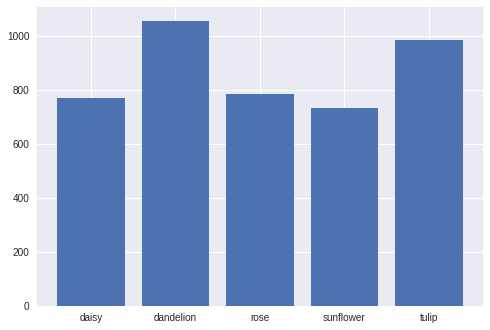

In [0]:
flowerlen=[]
for category in categories:
  path=os.path.join(datadir,category)
  flowerlen.append(len(os.listdir(path)))
  
plt.bar(categories,flowerlen)
plt.show()
  

In [0]:
sum=0
for i in flowerlen:
  sum+=i
  
print(sum)

4326


In [0]:
from tqdm import tqdm
img_size=200
X=[]
y=[]
for category in categories:
  path=os.path.join(datadir,category)
  class_num=categories.index(category)
  for img in tqdm(os.listdir(path)):
    try:
      img_array=cv2.imread(os.path.join(path,img))
      img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
      new_array=cv2.resize(img_array,(img_size,img_size))
      new_array=new_array/255.0
      X.append(new_array)
      y.append(class_num)
    
    except Exception as e:
      pass
    

100%|██████████| 984/984 [00:03<00:00, 257.61it/s]


In [0]:
X=np.array(X).reshape(-1,img_size,img_size,3)

In [0]:
print(X.shape)

(4323, 200, 200, 3)


In [0]:
#from keras.preprocessing.image import ImageDataGenerator
#from sklearn.model_selection import train_test_split

#X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.25)

In [0]:
X[1]

array([[[0.36470588, 0.45490196, 0.24313725],
        [0.36470588, 0.4627451 , 0.24705882],
        [0.36470588, 0.4627451 , 0.24705882],
        ...,
        [0.37254902, 0.4627451 , 0.25098039],
        [0.37254902, 0.4627451 , 0.25098039],
        [0.37254902, 0.4627451 , 0.25098039]],

       [[0.36078431, 0.45882353, 0.24313725],
        [0.36078431, 0.45882353, 0.24313725],
        [0.36470588, 0.45882353, 0.24705882],
        ...,
        [0.37254902, 0.4627451 , 0.25098039],
        [0.37254902, 0.4627451 , 0.25098039],
        [0.37254902, 0.4627451 , 0.25098039]],

       [[0.36470588, 0.45882353, 0.24313725],
        [0.36470588, 0.45490196, 0.24313725],
        [0.36470588, 0.45490196, 0.24313725],
        ...,
        [0.37254902, 0.4627451 , 0.25098039],
        [0.37254902, 0.4627451 , 0.25098039],
        [0.37254902, 0.4627451 , 0.25098039]],

       ...,

       [[0.38431373, 0.4627451 , 0.2627451 ],
        [0.38431373, 0.4627451 , 0.2627451 ],
        [0.38431373, 0

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rotation_range=30, horizontal_flip=0.5,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2)

training_set=datagen.flow_from_directory('flowers',target_size=(img_size,img_size),batch_size=25)

Using TensorFlow backend.


Found 4323 images belonging to 5 classes.


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,MaxPooling2D,Flatten,Conv2D


model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(200,200,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(64,(3,3)) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(64,(3,3)) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(5))             #The number of ways we classify is 5. So we have a dense output layer of 5 and sice we use softmax function. 
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit_generator(training_set,steps_per_epoch=250,epochs=15)   #For using model.fit_generator refer https://www.pyimagesearch.com/2018/12/24/how-to-use-keras-fit-and-fit_generator-a-hands-on-tutorial/

model.save("Flowers.model")



In [0]:
import keras
from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform

with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
        model = load_model("Flowers.model")
model.summary()

In [0]:
from google.colab import files
files.download("Flowers.model")